In [2]:
import pandas as pd

# Set display options to show more rows and columns
pd.set_option('display.max_columns', None) # Show all columns

listings = pd.read_csv('final_listings.csv')

/Users/krys/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
listings

,host_since,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,host_verification_email,host_verification_phone,host_verification_work_email,wifi,heating,essentials,kitchen,smoke_alarm,air_conditioning,hangers,coffee_maker,dedicated_workspace,hot_water_kettle,hair_dryer,iron,tv,hot_water,washer,dryer,first_aid_kit,fire_extinguisher,refrigerator,pool,Gym,pets_allowed,free_parking_on_premises,paid_parking_on_premises,self_check-in,sentiment,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_time_nan,neighbourhood_group_cleansed_Eixample,neighbourhood_group_cleansed_Gràcia,neighbourhood_group_cleansed_Horta-Guinardó,neighbourhood_group_cleansed_Les Corts,neighbourhood_group_cleansed_Nou Barris,neighbourhood_group_cleansed_Sant Andreu,neighbourhood_group_cleansed_Sant Martí,neighbourhood_group_cleansed_Sants-Montjuïc,neighbourhood_group_cleansed_Sarrià-Sant Gervasi,property_type_Boat,property_type_Camper/RV,property_type_Casa particular,property_type_Earthen home,property_type_Entire cabin,property_type_Entire chalet,property_type_Entire condo,property_type_Entire guest suite,property_type_Entire guesthouse,property_type_Entire home,property_type_Entire loft,property_type_Entire place,property_type_Entire rental unit,property_type_Entire serviced apartment,property_type_Entire townhouse,property_type_Entire vacation home,property_type_Entire villa,property_type_Private room,property_type_Private room in bed and breakfast,property_type_Private room in boat,property_type_Private room in casa particular,property_type_Private room in chalet,property_type_Private room in condo,property_type_Private room in cottage,property_type_Private room in dome,property_type_Private room in floor,property_type_Private room in guest suite,property_type_Private room in guesthouse,property_type_Private room in home,property_type_Private room in hostel,property_type_Private room in loft,property_type_Private room in rental unit,property_type_Private room in serviced apartment,property_type_Private room in tiny home,property_type_Private room in townhouse,property_type_Private room in vacation home,property_type_Private room in villa,property_type_Room in aparthotel,property_type_Room in bed and breakfast,property_type_Room in boutique hotel,property_type_Room in hostel,property_type_Room in hotel,property_type_Room in serviced apartment,property_type_Shared room in bed and breakfast,property_type_Shared room in boutique hotel,property_type_Shared room in condo,property_type_Shared room in floor,property_type_Shared room in guest suite,property_type_Shared room in guesthouse,property_type_Shared room in home,property_type_Shared room in hostel,property_type_Shared room in hotel,property_type_Shared room in loft,property_type_Shared room in rental unit,property_type_Shared room in serviced apartment,property_type_Shared room in villa,property_type_Tiny home,property_type_Yurt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0.799129,1.000000,0.086502,0.002848,1.0,1.0,0.476053,0.636848,0.066667,0.020000,0.02,0.011923,0.135514,0.005343,0.253084,0.042433,0.014155,0.009804,0.935000,0.965124,0.886812,0.905000,0.958000,0.947361,0.891019,1.0,0.128569,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666727,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [4]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro

# Separate features and target
X = listings.drop(columns=["price"])
y = listings["price"]


# Set up 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)


def perform_cross_validation(X, y, model, kf):
    mse_scores = []
    mae_scores = []
    rmse_scores = []
    r2_scores = []
    residuals = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate residuals
        residuals.extend(y_test - y_pred)
        
        # Calculate evaluation metrics
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        
        # Store metrics in lists
        mse_scores.append(mse)
        mae_scores.append(mae)
        rmse_scores.append(rmse)
        r2_scores.append(r2)
    
    # Return the average metrics
    return np.mean(mse_scores), np.mean(mae_scores), np.mean(rmse_scores), np.mean(r2_scores), residuals


# Function to plot residuals
def plot_residuals(residuals):
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True, color='blue')
    plt.title('Residual Distribution')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.axvline(x=0, color='red', linestyle='--')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(residuals)), residuals, color='blue', alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title('Residuals vs. Fitted Values')
    plt.xlabel('Data Points')
    plt.ylabel('Residuals')
    plt.show()

    # Create a figure with subplots
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    # QQ Plot on the left
    stats.probplot(residuals, dist="norm", plot=ax[0])
    ax[0].set_title('QQ Plot')

    # Histogram with KDE (Kernel Density Estimate) on the right
    sns.histplot(residuals, kde=True, ax=ax[1], color='blue', bins=30)
    ax[1].axvline(0, linestyle='--', color='red')  # Add a line at residual=0
    ax[1].set_title('Residuals Distribution')
    plt.tight_layout()
    plt.show()   

    # Shapiro-Wilk Test
    shapiro_test = shapiro(residuals)
    print("Shapiro-Wilk Test:", shapiro_test)

In [8]:
from sklearn.linear_model import Lasso

lasso = Lasso()

mse_cv, mae_cv, rmse_cv, r2_cv, residuals = perform_cross_validation(X, y, lasso, kf)
print("Average MSE:", mse_cv)
print("Average MAE:", mae_cv)
print("Average RMSE:", rmse_cv)
print("Average R²:", r2_cv)

Average MSE: 0.00037097892081127266
Average MAE: 0.007903802014210363
Average RMSE: 0.018237966639140617
Average R²: -0.0010789449775610472


<h3>Ridge Regression</h3>

In [11]:
from sklearn.linear_model import Lasso, Ridge, BayesianRidge

ridge = Ridge()

mse_cv, mae_cv, rmse_cv, r2_cv, residuals = perform_cross_validation(X, y, ridge, kf)
print("Average MSE:", mse_cv)
print("Average MAE:", mae_cv)
print("Average RMSE:", rmse_cv)
print("Average R²:", r2_cv)

Average MSE: 0.0002743748101912808
Average MAE: 0.005004616201473173
Average RMSE: 0.015006467208663027
Average R²: 0.3635129401434203


<h3>K-Nearest Neighbors</h3>

In [9]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=3)

mse_cv, mae_cv, rmse_cv, r2_cv, residuals = perform_cross_validation(X, y, knn, kf)
print("With amenities:")
print("Average MSE:", mse_cv)
print("Average MAE:", mae_cv)
print("Average RMSE:", rmse_cv)
print("Average R²:", r2_cv)

With amenities:
Average MSE: 0.000254369059531808
Average MAE: 0.0047532904545668055
Average RMSE: 0.014739945126181653
Average R²: 0.36509065943909214


<h3>Decision Tree</h3>

In [10]:
from sklearn.tree import DecisionTreeRegressor

# Define the Decision Tree Regressor model
decision_tree = DecisionTreeRegressor(random_state=42, max_depth=5)

mse_cv, mae_cv, rmse_cv, r2_cv, residuals = perform_cross_validation(X, y, decision_tree, kf)
print("Average MSE:", mse_cv)
print("Average MAE:", mae_cv)
print("Average RMSE:", rmse_cv)
print("Average R²:", r2_cv)

Average MSE: 0.00020323232170694873
Average MAE: 0.00513735003673951
Average RMSE: 0.013426026684218679
Average R²: 0.3947073993105753


In [12]:
bayesian = BayesianRidge()

mse_cv, mae_cv, rmse_cv, r2_cv, residuals = perform_cross_validation(X, y, bayesian, kf)
print("Average MSE:", mse_cv)
print("Average MAE:", mae_cv)
print("Average RMSE:", rmse_cv)
print("Average R²:", r2_cv)

Average MSE: 0.0002745365647429806
Average MAE: 0.005023555397501788
Average RMSE: 0.015013957463593176
Average R²: 0.36267266395294623


<h3>XGBoost</h3>

Average MSE: 0.00017591470458236416
Average MAE: 0.003666813312558292
Average RMSE: 0.012106892724692734
Average R²: 0.5611227962566483


/Users/krys/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


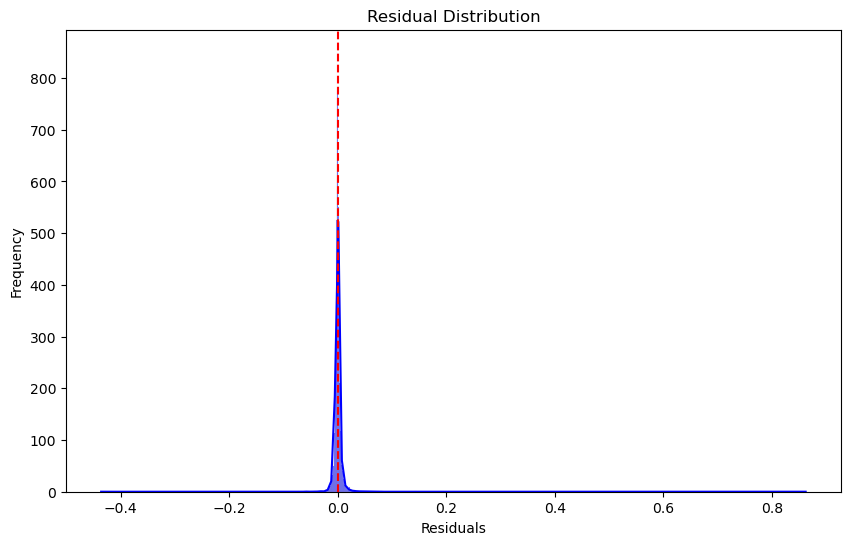

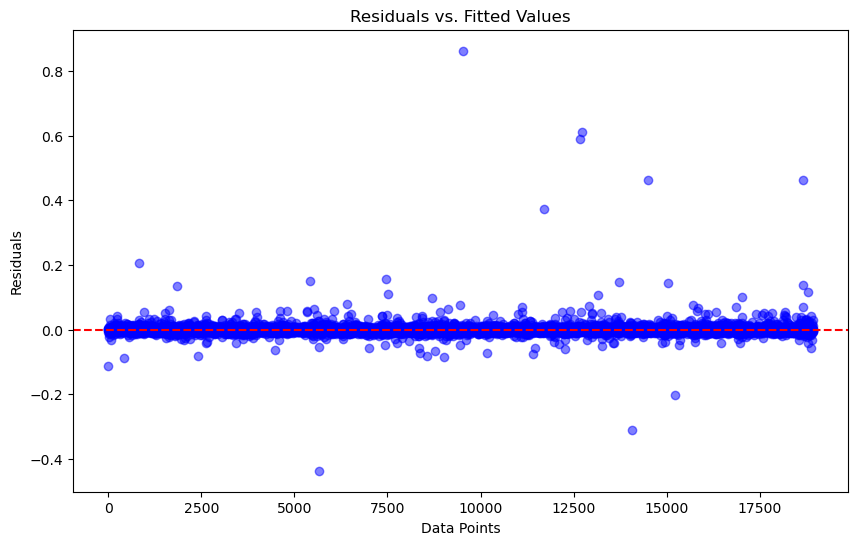

In [5]:
import xgboost as xgb

# Initialize the XGBoost model for regression
xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6)

# Perform cross-validation on X with amenities
mse_cv, mae_cv, rmse_cv, r2_cv, residuals = perform_cross_validation(X, y, xgboost_model, kf)
print("Average MSE:", mse_cv)
print("Average MAE:", mae_cv)
print("Average RMSE:", rmse_cv)
print("Average R²:", r2_cv)

plot_residuals(residuals)

<h3>Random Forest</h3>

Average MSE: 0.00015887670398587092
Average MAE: 0.003338814625407941
Average RMSE: 0.011639657054381929
Average R²: 0.5442543241559806


/Users/krys/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


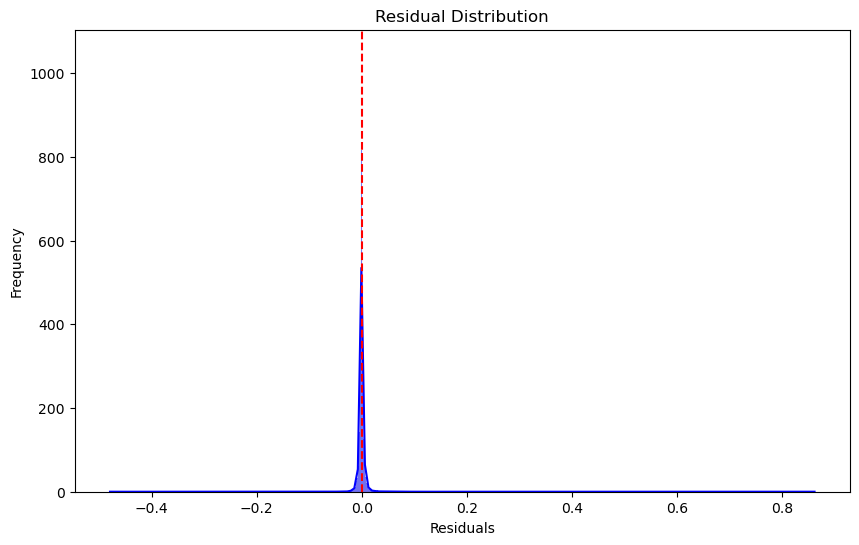

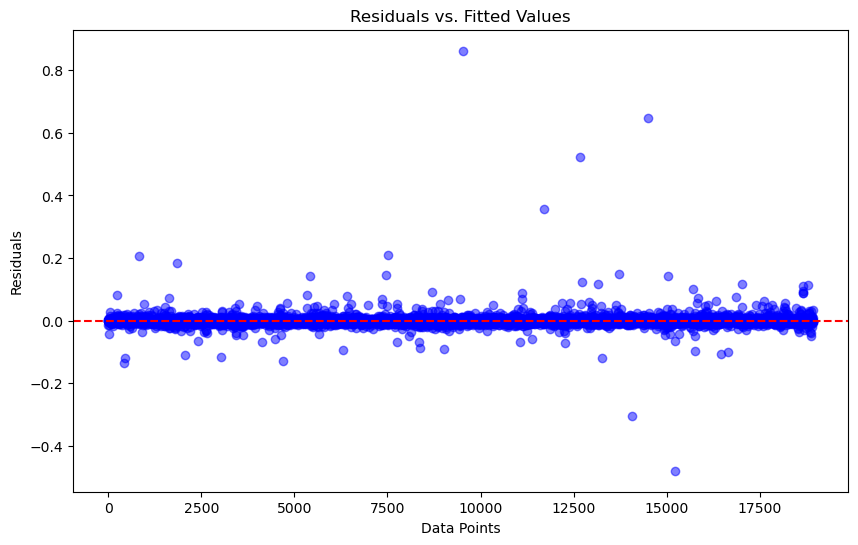

In [6]:
from sklearn.ensemble import RandomForestRegressor

# Define the Random Forest model
random_forest = RandomForestRegressor(random_state=42)

# Perform cross-validation on X with amenities
mse_cv, mae_cv, rmse_cv, r2_cv, residuals = perform_cross_validation(X, y, random_forest, kf)
print("Average MSE:", mse_cv)
print("Average MAE:", mae_cv)
print("Average RMSE:", rmse_cv)
print("Average R²:", r2_cv)

plot_residuals(residuals)

<h3>Feature Importance Analysis</h3>


                      Feature  Importance
8                accommodates    0.187853
19  review_scores_cleanliness    0.141064
12             minimum_nights    0.069668
14          number_of_reviews    0.067776
25          reviews_per_month    0.051308
10                   bedrooms    0.050686
9                   bathrooms    0.035244
23        review_scores_value    0.033022
11                       beds    0.032304
6                    latitude    0.023047


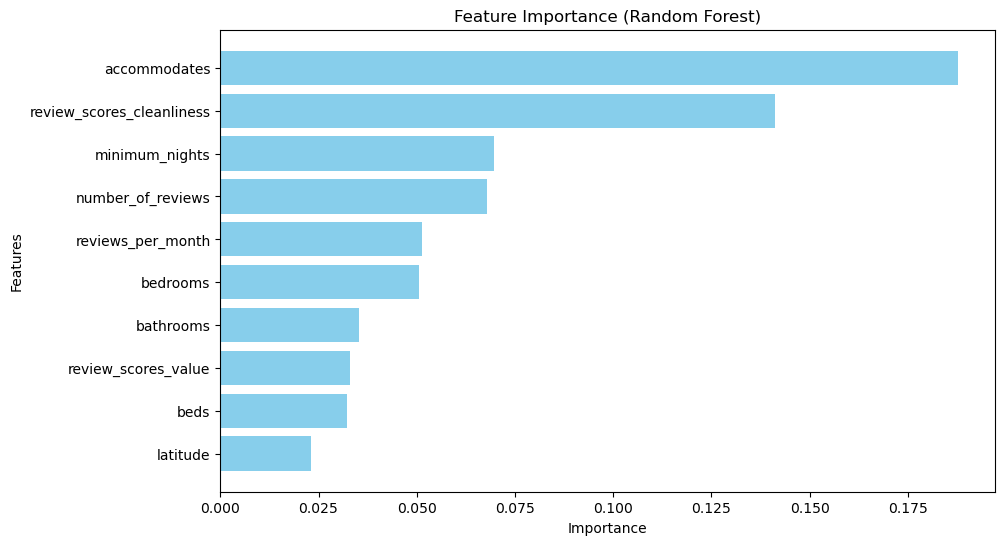

In [7]:
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = random_forest.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display only the top 5 most important features
top_10_features = importance_df.head(10)

print(top_10_features)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance (Random Forest)')
plt.gca().invert_yaxis()  # Invert y-axis to show most important feature at the top
plt.show()

                      Feature  Importance
0                  host_since       276.0
12             minimum_nights       225.0
9                   bathrooms       188.0
8                accommodates       178.0
3   host_total_listings_count       158.0
11                       beds       148.0
6                    latitude       145.0
14          number_of_reviews       143.0
1          host_response_rate       139.0
19  review_scores_cleanliness       138.0


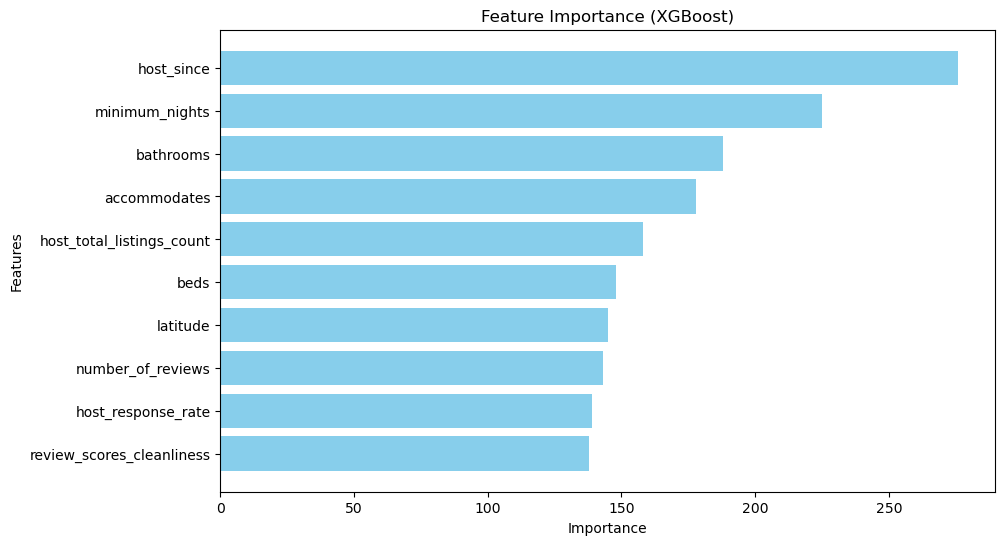

In [8]:
import matplotlib.pyplot as plt

# Get feature importance as a dictionary
importance_dict = xgboost_model.get_booster().get_score(importance_type='weight')

# Convert the dictionary to a DataFrame
importance_df = pd.DataFrame(list(importance_dict.items()), columns=['Feature', 'Importance'])

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)

# Print the DataFrame
print(importance_df.head(10))

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance (XGBoost)')
plt.gca().invert_yaxis()  # Invert y-axis to show most important feature at the top
plt.show()